Dataset Shape: (90000, 19)

Dataset Preview:
   Student_ID   Region  Gender Enrollment_Type Subject_Group  SSC_I_Marks  \
0           1  Mohmand    Male         Regular       Science          682   
1           2  Mohmand    Male         Regular       Science          535   
2           3  Mohmand  Female         Private          Arts          697   
3           4   Khyber  Female         Regular          Arts          705   
4           5  Chitral  Female         Regular          Arts          308   

   SSC_II_Marks  HSSC_I_Marks  Attendance_Rate Parent_Education_Level  \
0           772           390            59.84                College   
1           532           800            76.71               Graduate   
2           692           331            81.94                College   
3           584           603            96.10                College   
4           737           812            95.75            High School   

  Parent_Income  Study_Hours Extra_Tuition School_Typ

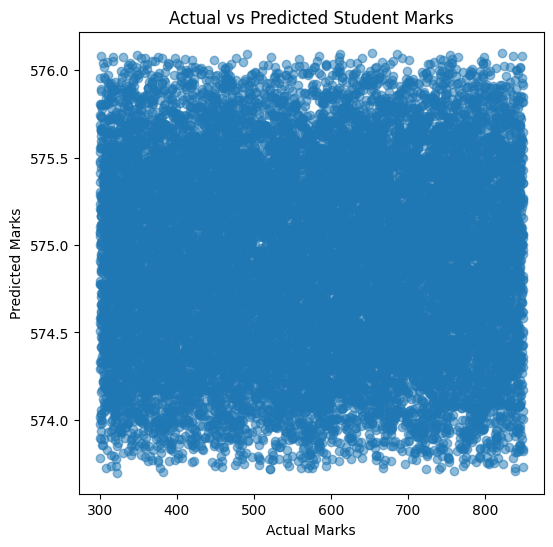


Predicted HSSC II Marks for New Student: 573.8904770744267


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# =========================================
# Student Performance Prediction
# Linear Regression (Google Colab Ready)
# =========================================

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv("/content/student_performance_dataset_90k.csv")

print("Dataset Shape:", df.shape)
print("\nDataset Preview:")
print(df.head())

# 3. Select Required Columns
# Features: Study Hours, Attendance
# Target: Final Marks (HSSC_II_Marks)

data = df[['Study_Hours', 'Attendance_Rate', 'HSSC_II_Marks']]

# 4. Check Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop missing values (if any)
data = data.dropna()

# 5. Split Features and Target
X = data[['Study_Hours', 'Attendance_Rate']]
y = data['HSSC_II_Marks']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)

# 7. Create Linear Regression Model
model = LinearRegression()

# 8. Train Model
model.fit(X_train, y_train)

# 9. Model Parameters
print("\nModel Coefficients:")
print("Study Hours Coefficient:", model.coef_[0])
print("Attendance Rate Coefficient:", model.coef_[1])
print("Intercept:", model.intercept_)

# 10. Predictions
y_pred = model.predict(X_test)

# 11. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# 12. Visualization: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Student Marks")
plt.show()

# 13. Predict for a New Student
# Example: Study Hours = 5, Attendance = 85%
new_student = np.array([[5, 85]])
predicted_marks = model.predict(new_student)

print("\nPredicted HSSC II Marks for New Student:", predicted_marks[0])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')